<a href="https://colab.research.google.com/github/Deeshant2234/C-Programming/blob/main/2D_Image_Reconstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Compresed Sensing for image Reconstruction(2D Signal )**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.fftpack as spfft
import cvxpy as cvx
import scipy.ndimage as spimg
import cv2 as cv
import matplotlib.image as mpimg

In [ ]:
#Creating Function for Discrete and Inverse Discrete Cosine Transform

def dct2(x):
    return spfft.dct(spfft.dct(x.T, norm='ortho', axis=0).T, norm='ortho', axis=0)

def idct2(x):
    return spfft.idct(spfft.idct(x.T, norm='ortho', axis=0).T, norm='ortho', axis=0)

def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = (0.2989*r) + (0.5870*g) + (0.1140*b)
    return gray


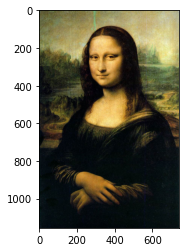

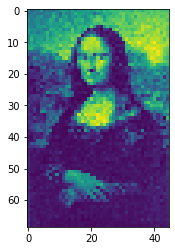

In [ ]:
# read original image and downsize for speed
#Xorig =spimg.imread('logo.png', flatten=True, mode='L') # read in grayscale
Xorig = mpimg.imread('monalisa.png')
grayImg = rgb2gray(Xorig);
X = spimg.zoom(grayImg , 0.06)
ny,nx = X.shape
imgplot = plt.imshow(Xorig)
plt.show()
imgplot = plt.imshow(X)
plt.show()

In [ ]:
# extract small sample of signal
k = round(nx * ny * 0.5) # 50% sample
ri = np.random.choice(nx * ny, k, replace=False) # random sample of indices
b = X.T.flat[ri]
b = np.expand_dims(b, axis=1)

# create dct matrix operator using kron (memory errors for large ny*nx)
A = np.kron(
    spfft.idct(np.identity(nx), norm='ortho', axis=0),
    spfft.idct(np.identity(ny), norm='ortho', axis=0)
    )
A = A[ri,:] # same as phi times kron


In [ ]:
# do L1 optimization
vx = cvx.Variable((nx*ny,1))
objective = cvx.Minimize(cvx.norm(vx, 1))
constraints = [A*vx==b]
prob = cvx.Problem(objective, constraints)
result = prob.solve(verbose=True)
Xat2 = np.array(vx.value).squeeze()

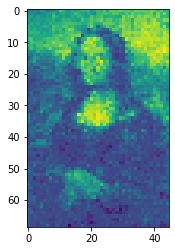

In [ ]:
# reconstruct signal
Xat = Xat2.reshape(nx, ny).T # stack columns
Xa = idct2(Xat)

# create images of mask (for visualization)
mask = np.zeros(X.shape)
mask.T.flat[ri] = 255
Xm = 255 * np.ones(X.shape)
Xm.T.flat[ri] = X.T.flat[ri]

imgplot = plt.imshow(Xa)
plt.show()
